## Project Description

This project is a regression project that aims to predict the IQ of a baby based on a set of input features from their mother. The stages involved in this project are as follows:

1. Data Exploration: In this stage, we analyze the dataset to gain insights into its structure, identify potential relationships between variables, and understand the distribution of the target variable.

2. Data Cleaning: In this stage, we handle missing values, outliers, and any inconsistencies in the dataset. This involves techniques such as imputation, removal of outliers, and data normalization.

3. Data Analysis: In this stage, we perform exploratory data analysis (EDA) to further understand the relationships between variables, identify patterns, and detect any potential issues that may affect the regression model.

4. Model Development: In this stage, we develop a regression model using appropriate algorithms such as linear regression, decision trees, or ensemble methods. We train the model on the cleaned dataset and tune its hyperparameters to optimize its performance.

5. Model Testing: In this stage, we evaluate the performance of the regression model using appropriate evaluation metrics such as mean squared error (MSE), root mean squared error (RMSE), or R-squared. We assess the model's ability to generalize to unseen data and make predictions on new instances.

Throughout these stages, we may iterate and refine our approach based on the insights gained and the performance of the model. The ultimate goal is to build an accurate regression model that can effectively predict the target variable based on the given input features.


In [12]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

# 1. Data exploration

In [3]:
sys.path.append('../DATA/iq_data')
data_child = pd.read_csv('../DATA/iq_data/child_iq.csv')
data_kid = pd.read_csv('../DATA/iq_data/kid_iq.csv')

In [4]:
print('Data child data frame:')
display(data_child)
print('Data kid data frame:')
display(data_kid)

Data child data frame:


,Unnamed: 0,ppvt,educ_cat,momage
0,1,120,2,21
1,2,89,1,17
2,3,78,2,19
3,4,42,1,20
4,5,115,4,26
...,...,...,...,...
395,396,87,3,21
396,397,69,2,20
397,398,80,1,25
398,399,98,1,18


Data kid data frame:


,Unnamed: 0,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,1,65,1,121.117529,4,27
1,2,98,1,89.361882,4,25
2,3,85,1,115.443165,4,27
3,4,83,1,99.449639,3,25
4,5,115,1,92.745710,4,27
...,...,...,...,...,...,...
429,430,94,0,84.877412,4,21
430,431,76,1,92.990392,4,23
431,432,50,0,94.859708,2,24
432,433,88,1,96.856624,2,21


data_child -> provides information like the child' test score at age 3 (ppvt), the mother's age at childbirth (momage), and the mother's education level (educ_cat, where 1 stands for no HS education, 2 = HS grad, 3 = some college, and 4 = college grad).

data_kid -> provides information on the kid's score (kid_score), if the mother went to high school or not (mom_hs), on the mother's IQ (mom_iq), on her job (mom_work), and finally on her age (mom_age)

### Exploration of Data Child dataset

In [12]:
data_child.describe()

,Unnamed: 0,ppvt,educ_cat,momage
count,400.000000,400.000000,400.000000,400.000000
mean,200.500000,86.932500,2.112500,22.790000
std,115.614301,20.440094,0.813325,2.689607
min,1.000000,20.000000,1.000000,17.000000
25%,100.750000,74.000000,2.000000,21.000000
50%,200.500000,90.000000,2.000000,23.000000
75%,300.250000,102.000000,3.000000,25.000000
max,400.000000,144.000000,4.000000,29.000000


In [13]:
data_child.drop('Unnamed: 0', axis=1, inplace=True)
print(data_child.columns)

Index(['ppvt', 'educ_cat', 'momage'], dtype='object')


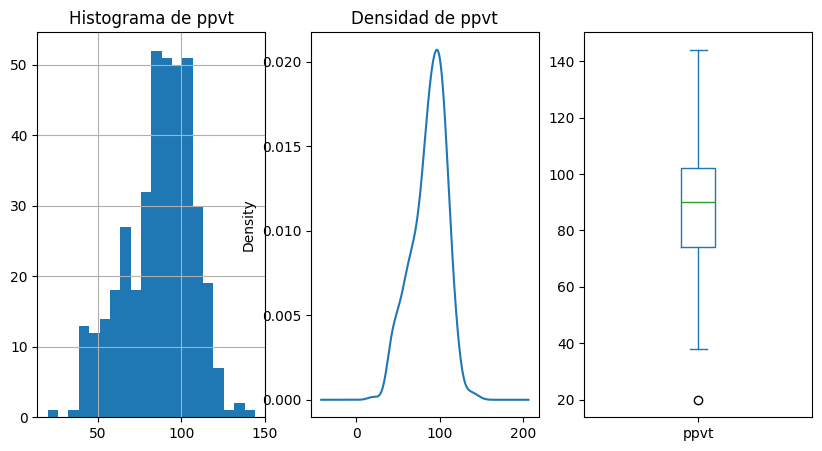

In [38]:
# Distribucion de ppvt: score at age 3
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))

data_child['ppvt'].hist(ax=ax1, bins=20, xlabelsize=10, ylabelsize=10)
ax1.set_title('Histograma de ppvt')

data_child['ppvt'].plot(kind='kde', ax=ax2)
ax2.set_title('Densidad de ppvt')

data_child['ppvt'].plot(kind='box', ax=ax3)

plt.show()

educ_cat
2    212
1     85
3     76
4     27
Name: count, dtype: int64

Correlation between educ_cat and ppvt: 0.203227320218482


Text(0.5, 0, 'Educational category')

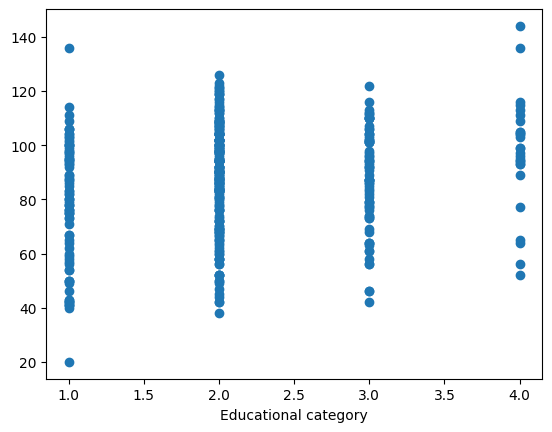

In [63]:
# educ_cat: education of the mother (categorical)
display(data_child['educ_cat'].value_counts())

correlation = data_child['educ_cat'].corr(data_child['ppvt'])
print("Correlation between educ_cat and ppvt:", correlation)

# Scatter plot 
plt.scatter(data_child['educ_cat'], data_child['ppvt'])
plt.xlabel('Educational category')  


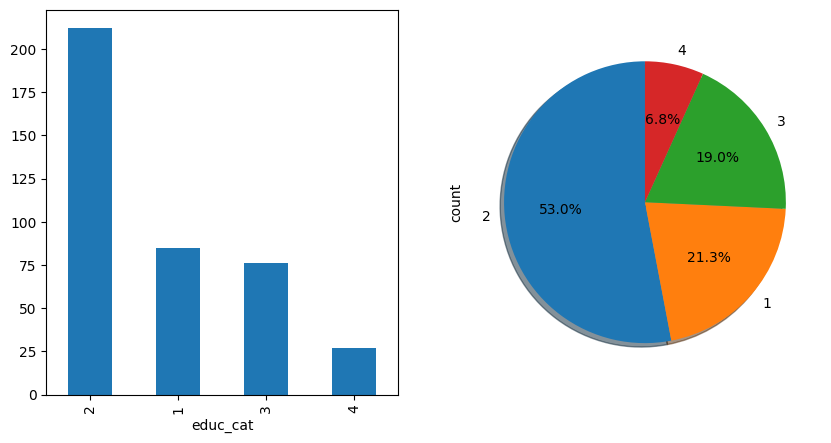

In [82]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

educ_cat_counts = data_child['educ_cat'].value_counts().head(4)
educ_cat_counts.plot(kind='bar', ax=ax1)

educ_cat_counts.plot(kind='pie',ax= ax2, autopct='%1.1f%%', startangle=90, shadow=True)
plt.show()

In [5]:
avg_score_by_mom_ed = data_child.groupby('educ_cat')['ppvt'].mean()

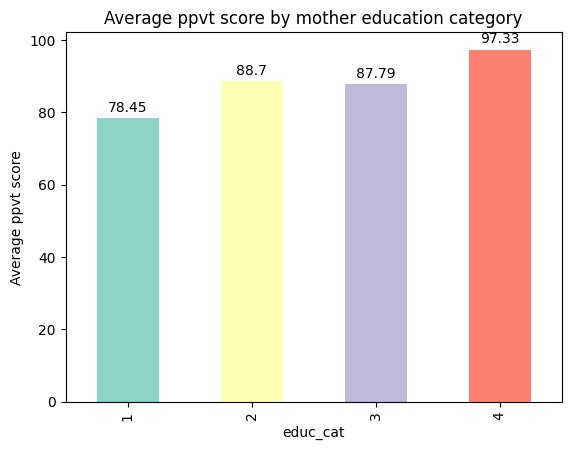

We can see thet the average ppvt score increases with the education of the mother


In [17]:
# Define a color palette
colors = sns.color_palette('Set3')

# Plot the bar chart with different colors for each bar
ax = avg_score_by_mom_ed.plot(kind='bar', color=colors)

# Add the score of ppvt over every bar
for i, v in enumerate(avg_score_by_mom_ed):
    ax.text(i, v + 1, str(round(v, 2)), ha='center', va='bottom')

# Display the plot
plt.title('Average ppvt score by mother education category')
plt.ylabel('Average ppvt score')
plt.show()

print('We can see thet the average ppvt score increases with the education of the mother')